In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [Link to the presentation](https://docs.google.com/presentation/d/1whMDvAyh9xqkEQYp3bysKU46WTE9XWzTI9DPoVjAh5c/edit?usp=sharing)

# [Link to the LinkedIn article](https://www.linkedin.com/pulse/what-makes-song-popular-anne-cuzeau/)

# [Link to the GitHub repository](https://github.com/Anne-Paris/DataScience_Project2_Spotify.git)

#Graphs formating

In [ ]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Data loading / cleaning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project 2 : Math 3439/data/spotify_tracks.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [ ]:
df['year'].min()

1921

In [ ]:
df['year'].max()

2020

In [ ]:
df['popularity'].min()

0

In [ ]:
df['popularity'].max()

100

In [ ]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [ ]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

#Any linear relationship?

## Plotting popularity vs everything.

Includes: Scatter plot and correlation

## Scatter plot / analysis function

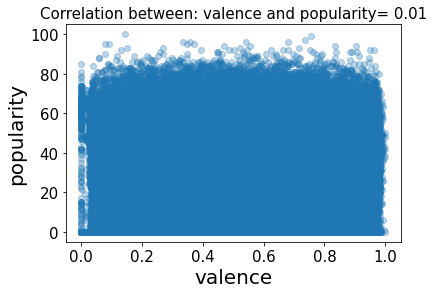

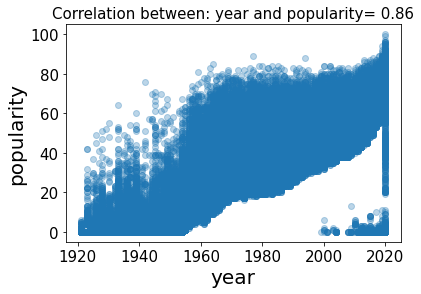

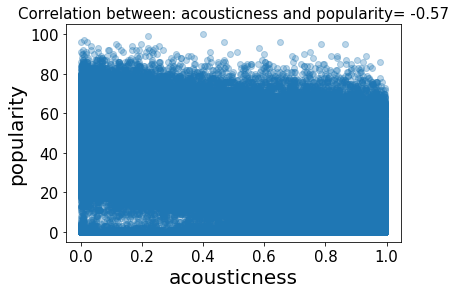

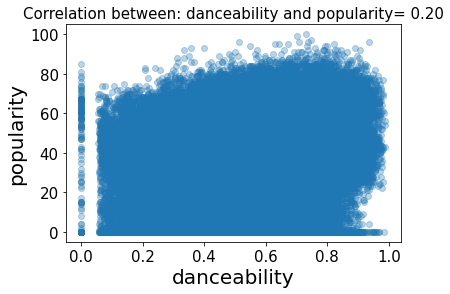

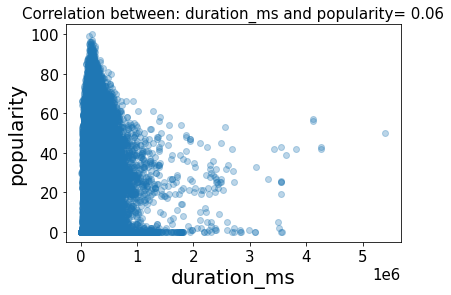

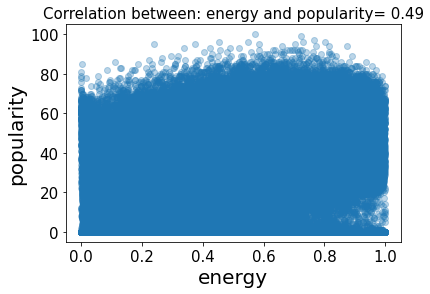

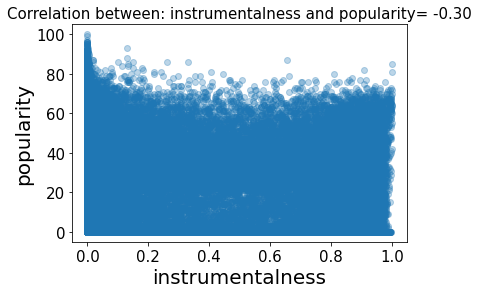

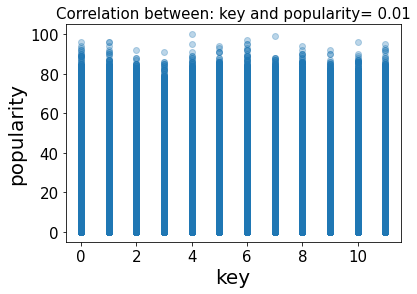

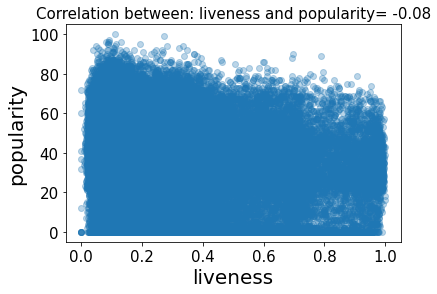

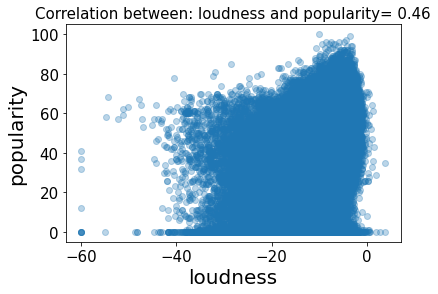

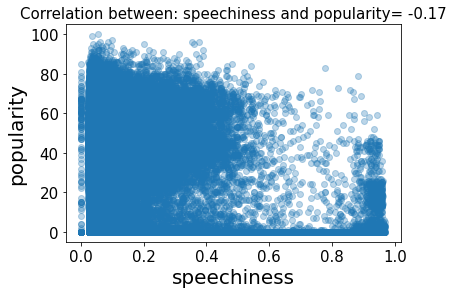

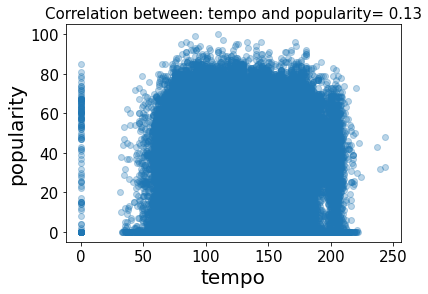

In [ ]:
dfplots = df.drop(columns=['artists', 'id', 'name', 'mode', 'explicit', 'release_date'])
list(dfplots.columns)

def scatterplots(colName):
  #Plot
  plt.figure(figsize=(6, 4))
  corr = dfplots[colName].corr(dfplots['popularity'])
  plt.scatter(y=dfplots['popularity'], x=dfplots[colName], alpha= 0.3)
  plt.title(f'Correlation between: {colName} and popularity= {corr:.2f}')
  plt.xlabel(colName)
  plt.ylabel('popularity')
  plt.show()
  


for colName in list(dfplots.columns):
  if colName != 'popularity':
    scatterplots(colName)

#Distribution of popularity

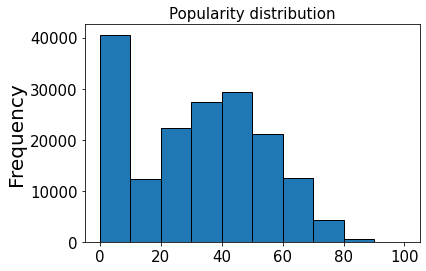

In [ ]:
df['popularity'].plot(kind='hist', edgecolor='black', title='Popularity distribution')

## Most songs have a popularity of 0

In [ ]:
rows = df.shape[0]

percentAt0 = (df[(df['popularity'] == 0)].shape[0] / df.shape[0]) * 100
percentAt0

16.344277569102214

Excluding songs with a popularity of 0 for a more even distribution (visualization only, not used for modelling)

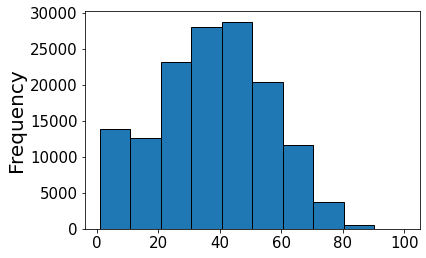

In [ ]:
dfNoZero = df[(df['popularity'] > 0)]
dfNoZero['popularity'].plot(kind='hist', edgecolor='black')

## Impact of a more even distribution on popularity vs other variables

Correlation coef between: valence  and popularity= -0.006566067726481778


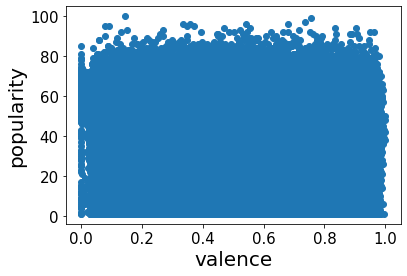

Correlation coef between: year  and popularity= 0.8148781978104986


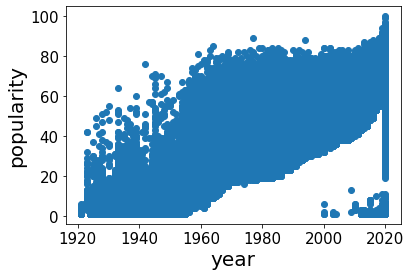

Correlation coef between: acousticness  and popularity= -0.4675203601626296


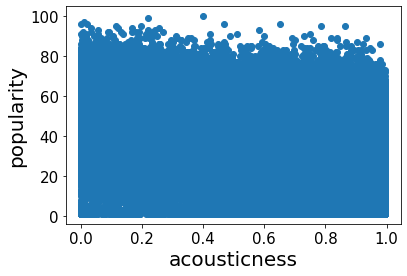

Correlation coef between: danceability  and popularity= 0.2078040420574431


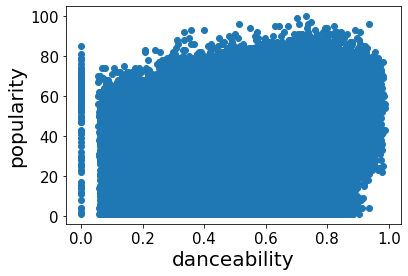

Correlation coef between: duration_ms  and popularity= 0.034130169387420875


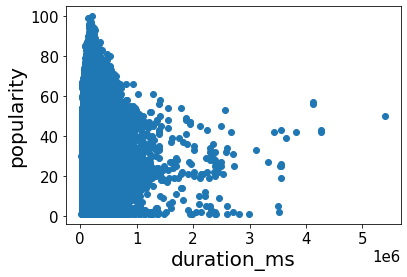

Correlation coef between: energy  and popularity= 0.3810452836235401


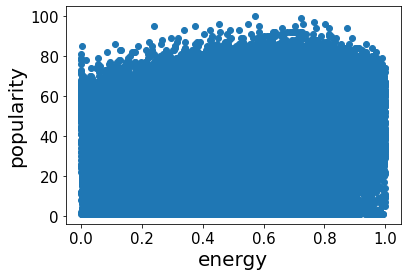

Correlation coef between: instrumentalness  and popularity= -0.2113156843731429


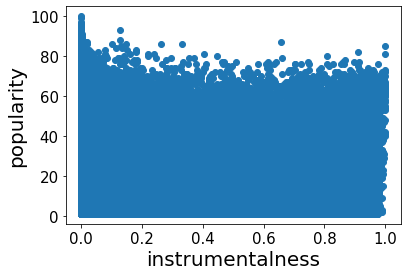

Correlation coef between: key  and popularity= 0.011152668193917201


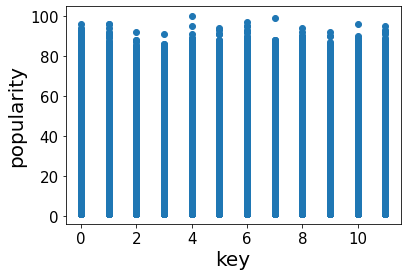

Correlation coef between: liveness  and popularity= -0.06787593607299634


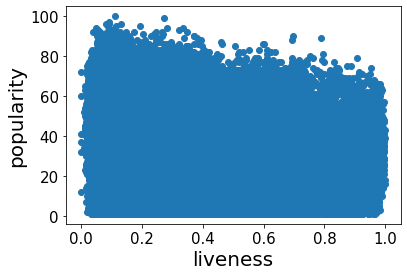

Correlation coef between: loudness  and popularity= 0.40901117001677467


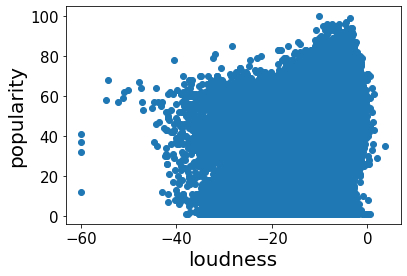

Correlation coef between: speechiness  and popularity= -0.020425775878434804


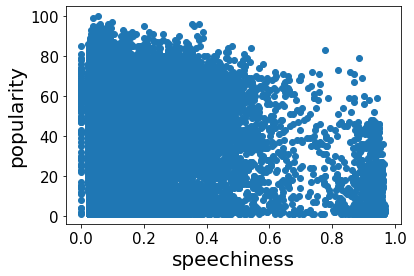

Correlation coef between: tempo  and popularity= 0.08388648180859651


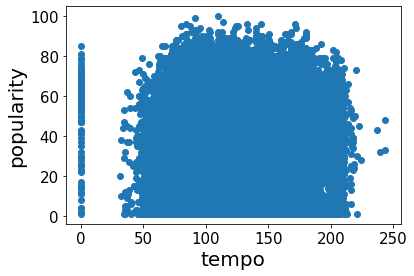

In [ ]:
dfplotsNoZero = dfNoZero.drop(columns=['artists', 'id', 'name', 'mode', 'explicit', 'release_date'])
list(dfplotsNoZero.columns)

def scatterplots(colName):
  #Plot
  corr = dfplotsNoZero[colName].corr(dfplotsNoZero['popularity'])
  print(f'Correlation coef between: {colName}  and popularity= {corr}')
  plt.figure(figsize=(6, 4))
  plt.scatter(y=dfplotsNoZero['popularity'], x=dfplotsNoZero[colName])
  plt.xlabel(colName)
  plt.ylabel('popularity')
  plt.show()


for colName in list(dfplotsNoZero.columns):
  if colName != 'popularity':
    scatterplots(colName)

## Looking at all variables: what are the correlations higher than |0.5| for ALL variables?

Correlation coef between: valence  and danceability= 0.5450327007334114


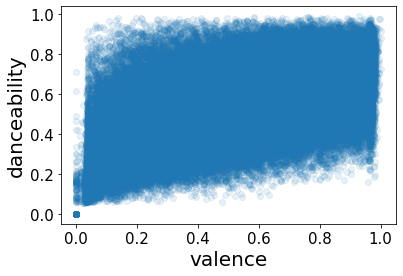

Correlation coef between: year  and acousticness= -0.5295655668142213


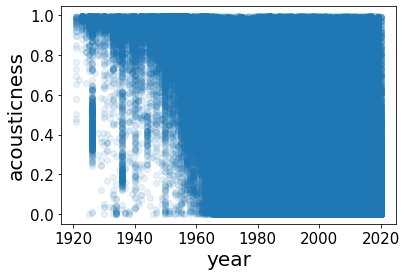

Correlation coef between: year  and popularity= 0.8148781978104986


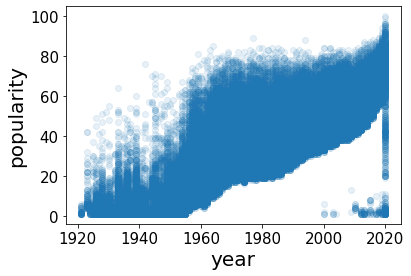

Correlation coef between: acousticness  and year= -0.5295655668142213


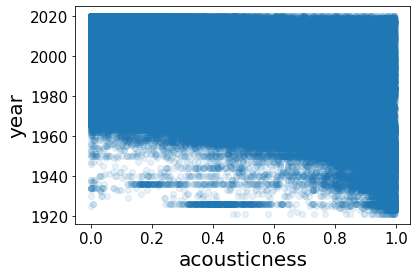

Correlation coef between: acousticness  and energy= -0.7507841498414969


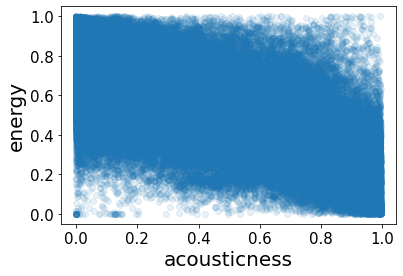

Correlation coef between: acousticness  and loudness= -0.5885940286851855


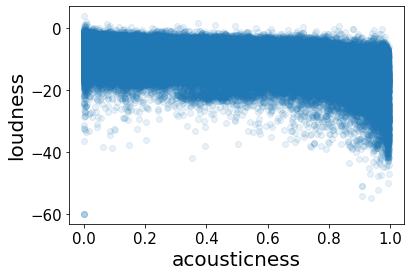

Correlation coef between: danceability  and valence= 0.5450327007334113


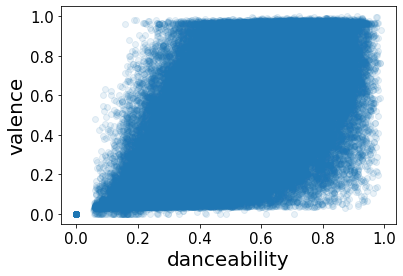

Correlation coef between: energy  and acousticness= -0.7507841498414969


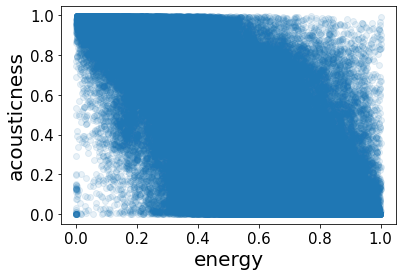

Correlation coef between: energy  and loudness= 0.7805336099804155


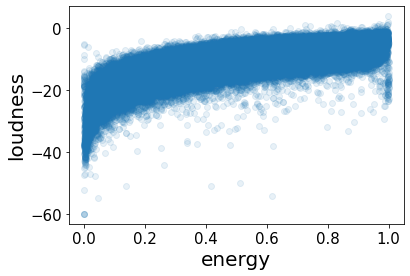

Correlation coef between: loudness  and acousticness= -0.5885940286851855


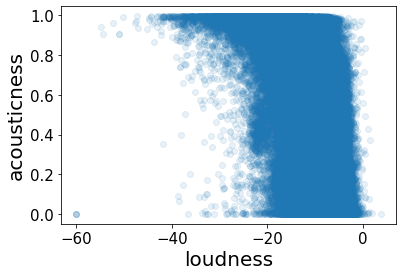

Correlation coef between: loudness  and energy= 0.7805336099804155


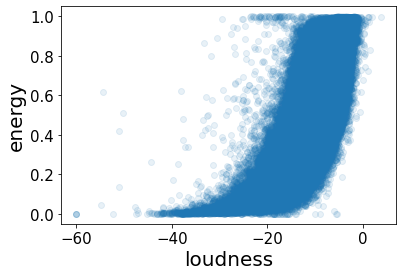

Correlation coef between: popularity  and year= 0.8148781978104986


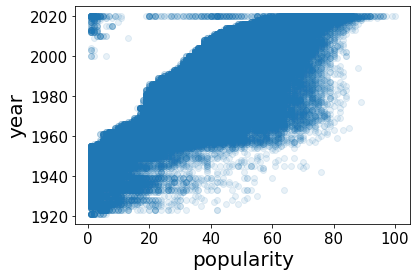

In [ ]:
columnsall = list(dfplotsNoZero.columns)

half = len(columnsall)//2
firstHalf = columnsall[:half]
secondHalf = columnsall [half:]

for xCol in columnsall:
  i = 0
  xValue = xCol
  while i < len(columnsall):
    yValue = columnsall[i]
    if (xValue != yValue):
      dfForPlot = dfplotsNoZero[[xValue,yValue]]
      corr = dfForPlot[xValue].corr(dfForPlot[yValue])
      if ((corr > 0.5) or (corr < -0.5)): 
        print(f'Correlation coef between: {xValue}  and {yValue}= {corr}')
        plt.figure(figsize=(6, 4))
        plt.scatter(y=dfplotsNoZero[yValue], x=dfplotsNoZero[xValue], alpha=0.1)
        plt.xlabel(xValue)
        plt.ylabel(yValue)
        plt.show()
    i = i + 1




# Popular v/s unpopular

More unpopular songs than popular one

In [ ]:
dfUnPopular = dfplots[(dfplots['popularity'] == 0)]
dfUnPopular.shape[0]

27892

In [ ]:
dfPopular = dfplots[(dfplots['popularity'] > 70)]
dfPopular.shape[0]

4265

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


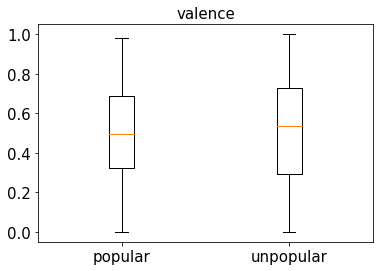

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


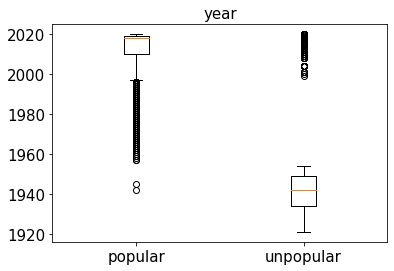

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


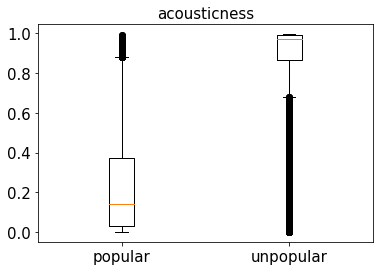

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


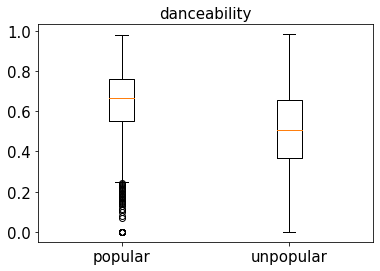

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


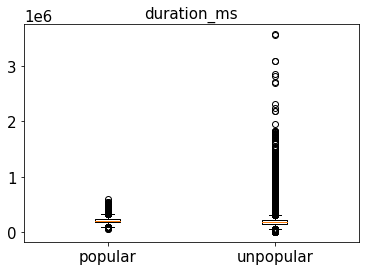

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


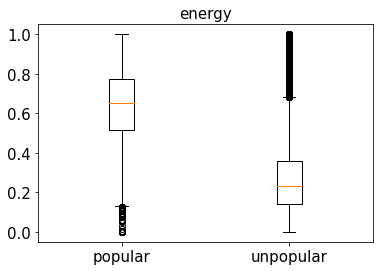

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


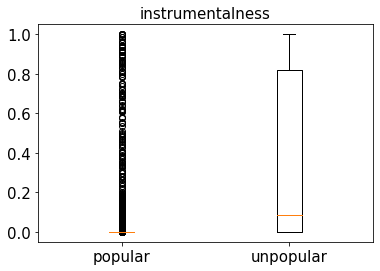

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


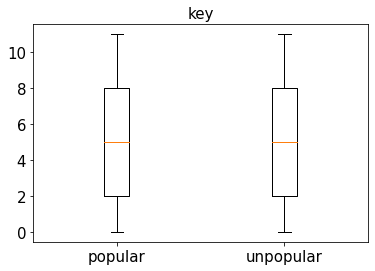

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


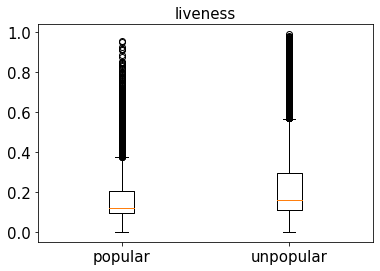

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


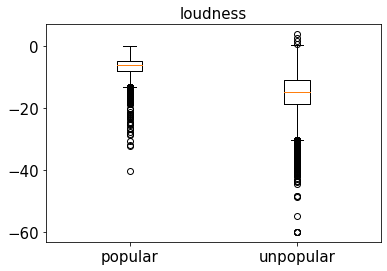

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


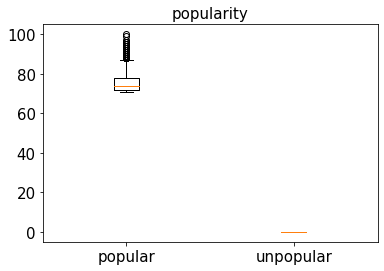

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


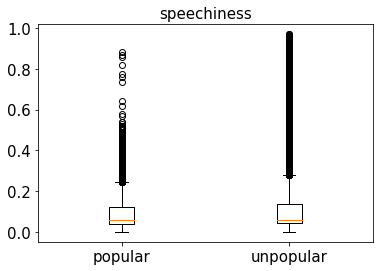

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


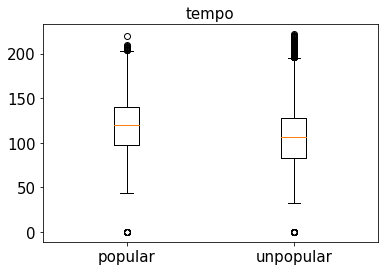

In [ ]:
columnsall = list(dfplotsNoZero.columns)

for col in columnsall:
  popular_songs = dfPopular[col]
  unpopular_songs = dfUnPopular[col]
  data = [popular_songs, unpopular_songs]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['popular', 'unpopular'])
  plt.show()

Things that 'matter' a lot according to box plots:
*   Higher Energy (between 0.5 - 1)
*   Low acousticness (between 0.4 - 0)
*   Low instrumentalness

Somewhat matters:
* higher loudness
* shorter duration
* higher danceability

## Comparing older and newer songs

For year: most unpopular songs are older 1960

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


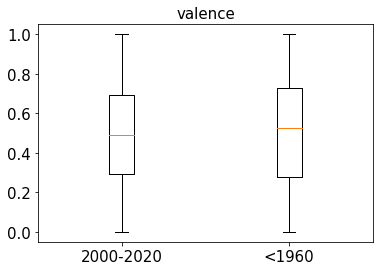

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


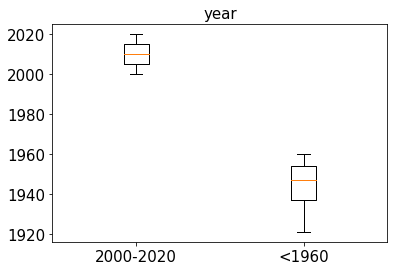

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


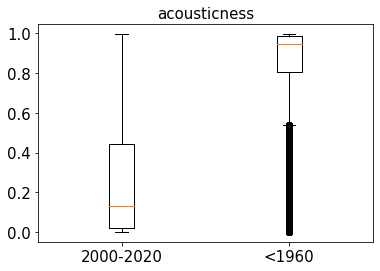

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


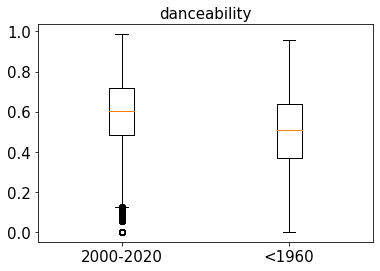

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


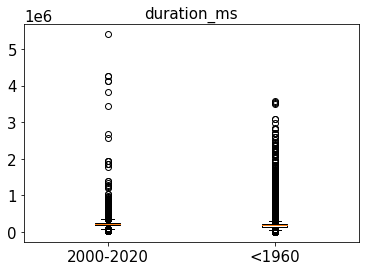

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


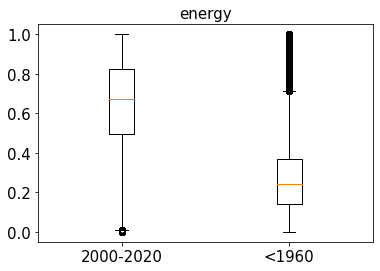

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


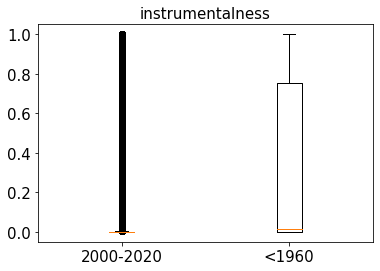

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


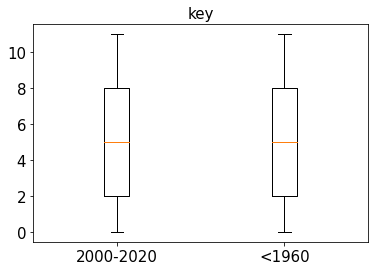

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


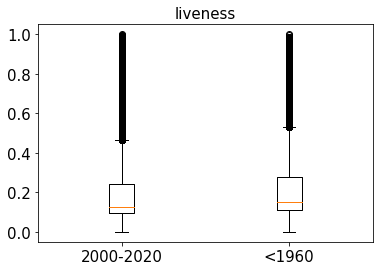

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


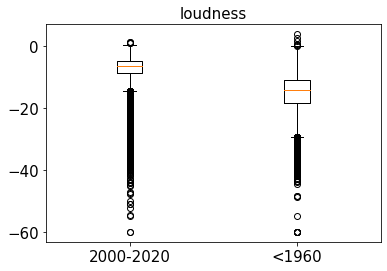

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


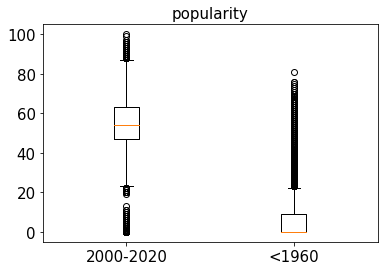

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


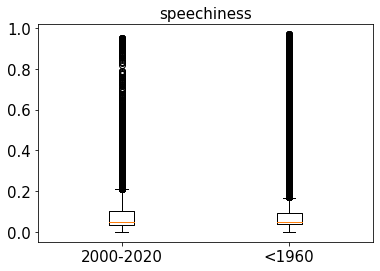

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


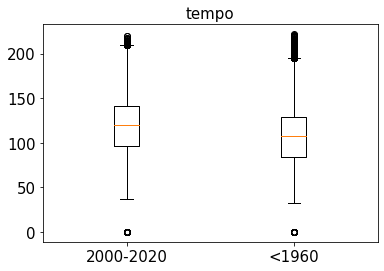

In [ ]:
df2001_2020 = df[(df['year'] >= 2000) & (df['year'] <= 2020)]
df1960_0 = df[(df['year'] >= 0) & (df['year'] <= 1960)]

for col in columnsall:
  newer_songs = df2001_2020[col]
  older_songs = df1960_0[col]
  data = [newer_songs, older_songs]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['2000-2020', '<1960'])
  plt.show()

## Newer songs analysis: Popularity vs other factors

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


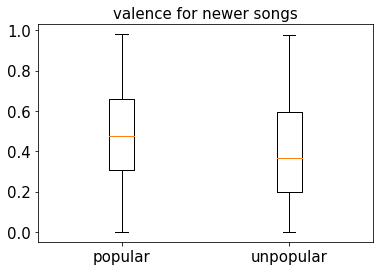

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


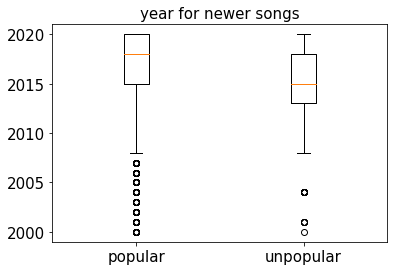

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


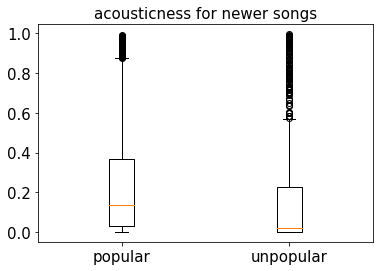

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


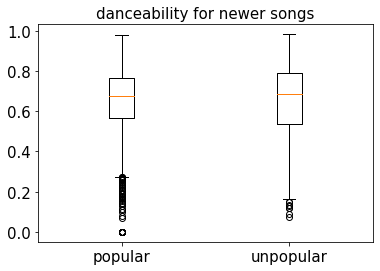

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


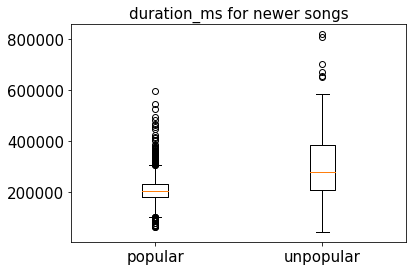

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


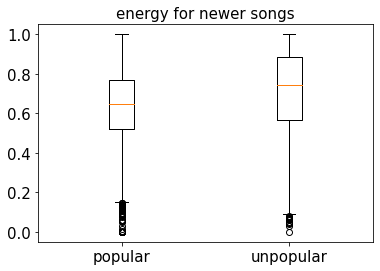

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


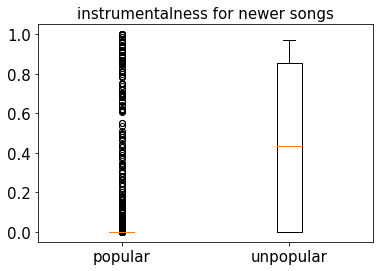

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


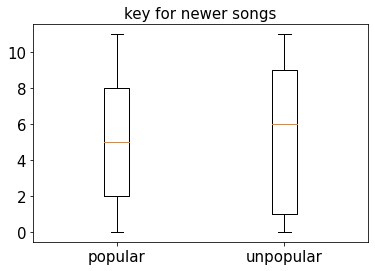

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


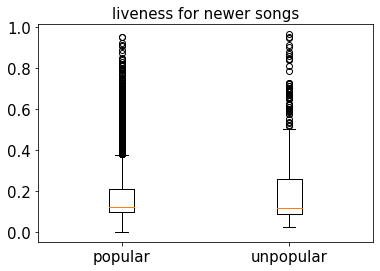

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


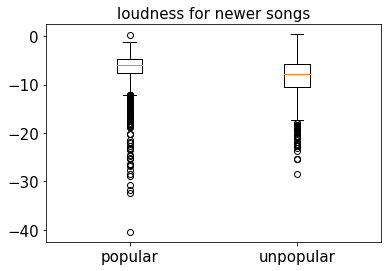

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


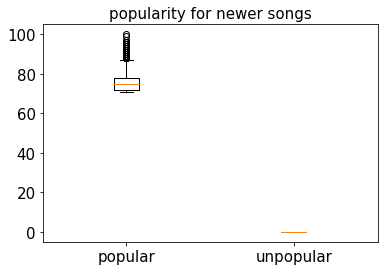

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


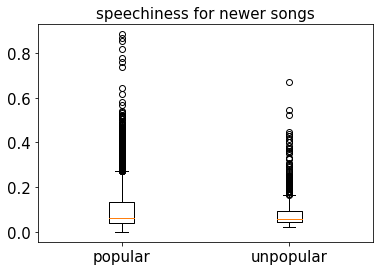

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


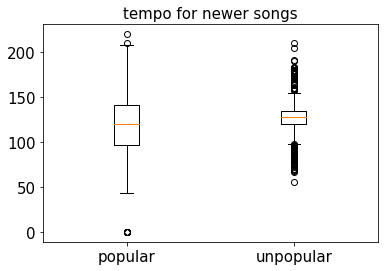

In [ ]:
df2001_2020 = df[(df['year'] >= 2000) & (df['year'] <= 2020)]
dfPopular2020 = df[(df['popularity'] > 70) & ((df['year'] >= 2000) & (df['year'] <= 2020))]
dfUnPopular2020 = df[(df['popularity'] == 0) & ((df['year'] >= 2000) & (df['year'] <= 2020))]

for col in columnsall:
  popular_songs = dfPopular2020[col]
  unpopular_songs = dfUnPopular2020[col]
  data = [popular_songs, unpopular_songs]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(f'{col} for newer songs')
  plt.xticks([1, 2], ['popular', 'unpopular'])
  plt.show()

## Older songs analysis: Popularity vs other factors

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


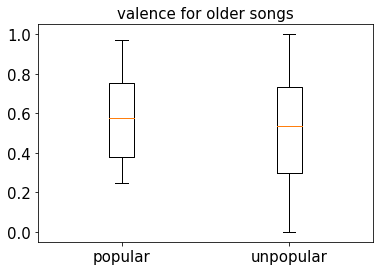

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


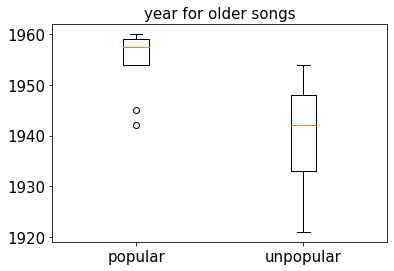

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


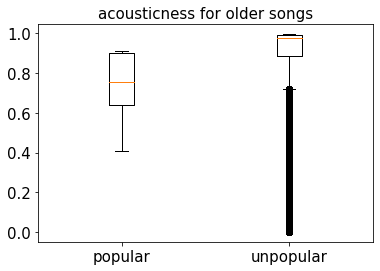

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


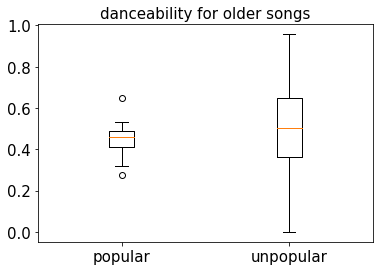

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


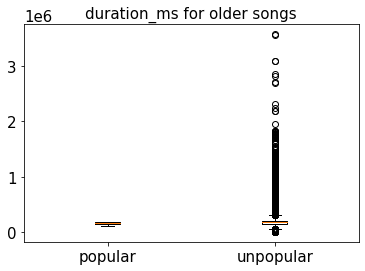

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


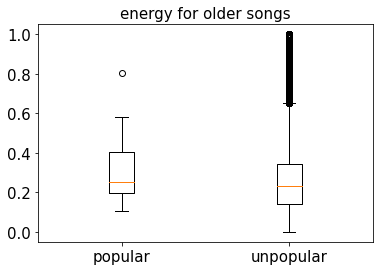

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


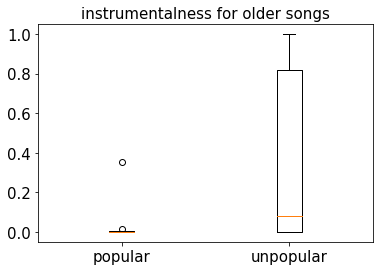

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


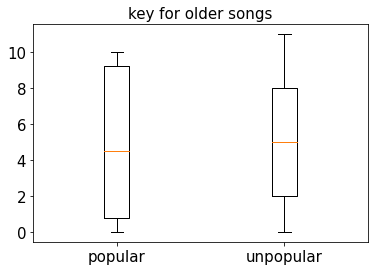

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


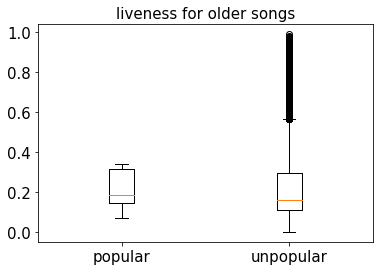

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


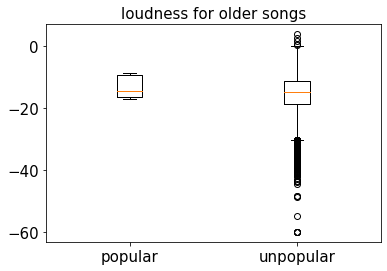

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


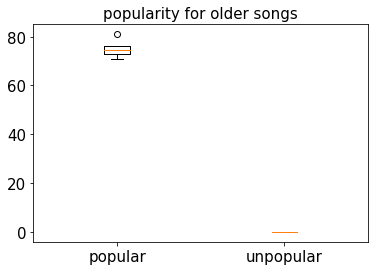

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


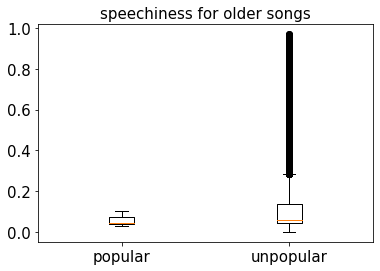

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


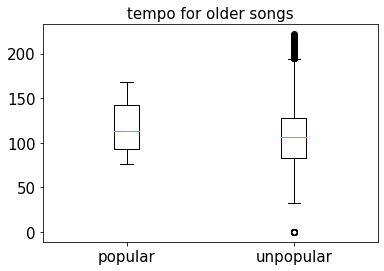

In [ ]:
df2001_2020 = df[(df['year'] <= 1960)]
dfPopular2020 = dfplots[(dfplots['popularity'] > 70) & (dfplots['year'] <= 1960)]
dfUnPopular2020 = dfplots[(dfplots['popularity'] == 0) & (dfplots['year'] <= 1960)]

for col in columnsall:
  popular_songs = dfPopular2020[col]
  unpopular_songs = dfUnPopular2020[col]
  data = [popular_songs, unpopular_songs]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(f'{col} for older songs')
  plt.xticks([1, 2], ['popular', 'unpopular'])
  plt.show()

# Acousticness coeficient
Objective: Rewarding older songs with high acousticness and newer songs with low acousticness

`Year * Acousticness`

- Year = 1960, Acousticness = 0.1 --> Small value
- Year = 1960, Acousticness = 0.9 --> Medium value
- Year = 2000, Acousticness = 0.1 --> Medium value
- Year = 1980, Acousticness = 0.5 --> Medium value
- Year = 2000, Acousticness = 0.9 --> Large value


If we want to reward: older with higher value, newer with smaller value:
* (years in the past) * acoustic
* (years in the past + 1 ) * acoustic 
Gives:
* 1960 * high acoustic = high = good
* 1960 * low acoustic = med 
* 2000 * high acoustic = low = bad
* 2000 * low acoustic = med

Here, rewarding: older with low values, newer with higher values:
* (years since 1920) * acoustic

Gives:
* 1960 (low) * high acoustic = med 
* 1960 (low) * low acoustic = low = bad 
* 2000 (high) * high acoustic = high = good
* 2000 (low)* low acoustic = med

In [ ]:
#new column, years in the past: year - 1920
dfweighted = dfplots
dfweighted['years_in_the_past'] = (dfweighted['year'] - 1920)
dfweighted['acoust_and_years_coef'] = (dfweighted['years_in_the_past'] * dfweighted['acousticness'])
dfweighted.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,years_in_the_past,acoust_and_years_coef
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,10,0.665,-20.096,4,0.0366,80.954,1,0.982
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,7,0.160,-12.441,5,0.4150,60.936,1,0.732
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,3,0.101,-14.850,5,0.0339,110.339,1,0.961
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,5,0.381,-9.316,3,0.0354,100.109,1,0.967
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,3,0.229,-10.096,2,0.0380,101.665,1,0.957


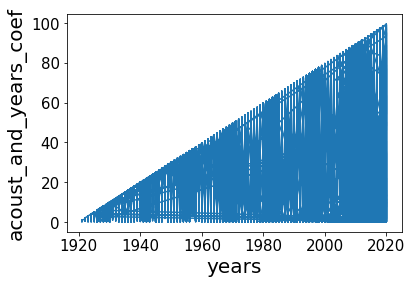

In [ ]:
plt.plot(dfweighted['year'], dfweighted['acoust_and_years_coef'])
plt.xlabel("years")
plt.ylabel("acoust_and_years_coef")
plt.show()

# Instrumentalness 

Found out that all popular songs (old or new) have a low instrumentness

To reward low instrumentalness:
* |1 - instrumentalness|

In [ ]:
#new column, instr_coef: |1 - instrumentalness|
dfweighted['instr_coef'] = abs(1 - dfweighted['instrumentalness'])
dfweighted.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,years_in_the_past,acoust_and_years_coef,instr_coef
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,10,0.665,-20.096,4,0.0366,80.954,1,0.982,0.122000
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,7,0.160,-12.441,5,0.4150,60.936,1,0.732,1.000000
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,3,0.101,-14.850,5,0.0339,110.339,1,0.961,0.087000
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,5,0.381,-9.316,3,0.0354,100.109,1,0.967,0.999972
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,3,0.229,-10.096,2,0.0380,101.665,1,0.957,0.999998


# Energy

Older songs: 
- popular songs have a *lower* energy than unpopular songs, but the range is 0.1-0.6

Newer songs:
- popular songs have a *higher* energy than unpopular songs, but the range is 0.5-0.8

Looking at energy, which at first seemed like high energy songs = popular songs. However, energy is going up overtime (median and average). So older popular songs have a range between 0.1-0.6 (higher than older, not popular songs) while newer popular songs are between 0.5-0.8 (lower than unpopular songs)

In [ ]:
df1920_1950 = df[(df['year'] <= 1950)]
df1951_1970 = df[(df['year'] >= 1951) & (df['year'] <= 1970)]
df1971_1990 = df[(df['year'] >= 1971) & (df['year'] <= 1990)]
df1991_2000 = df[(df['year'] >= 1991) & (df['year'] <= 2000)]
df2001_2010 = df[(df['year'] >= 2001) & (df['year'] <= 2010)]
df2011_2020 = df[(df['year'] >= 2011) & (df['year'] <= 2021)]

In [ ]:
#Proof: mean of energy  over time:
arrayDFByTime = [df1920_1950,df1951_1970,df1971_1990,df1991_2000,df2001_2010,df2011_2020]
listMed = []

print('mean over time:')
for time in arrayDFByTime:
  dfEnergy = time['energy']
  print(f'{dfEnergy.mean()}')

print('----------------------')
print('median over time:')
for time in arrayDFByTime:
  dfEnergy = time['energy']
  listMed.append(dfEnergy.median())
  print(f'{dfEnergy.median()}')

mean over time:
0.26488938549277763
0.3593648206299653
0.5679132395734001
0.5914000461902603
0.6572722792905714
0.6238633003537497
----------------------
median over time:
0.233
0.325
0.5770000000000001
0.608
0.6970000000000001
0.6509999999999999


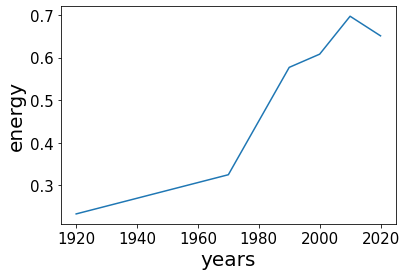

In [ ]:
listYears = [1920, 1970, 1990, 2000, 2010 , 2020]

plt.plot(listYears, listMed)
plt.xlabel("years")
plt.ylabel("energy")
plt.show()

[Source](https://towardsdatascience.com/removing-non-linear-trends-from-timeseries-data-b21f7567ed51)

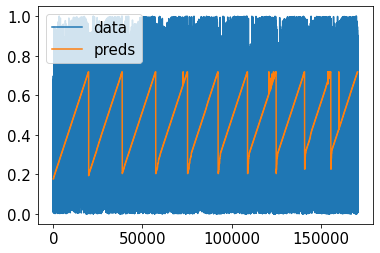

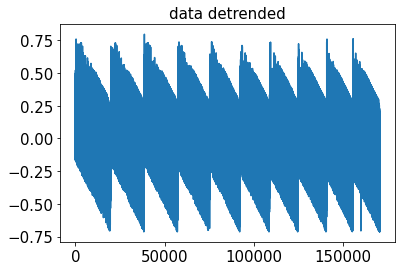

In [ ]:
#detrend:
X = df['year']
X = X.values.reshape(-1,1)
y = df['energy']
lr = LinearRegression()
lr.fit(X, y)
# calculate trend
preds = lr.predict(X)
# plot trend
plt.plot(y)
plt.plot(preds)
plt.legend(['data', 'preds'])
plt.show()
detr = [y[i] - preds[i] for i in range(0, len(y))]
plt.plot(detr)
plt.title('data detrended')
plt.show()

dftrend = df
dftrend['detr'] = [y[i] - preds[i] for i in range(0, len(y))]

Did detrending work?

mean over time:
-0.01092968950838386
-0.03384883413295
0.0652862615621116
0.0065808574958587315
0.017684828213318012
-0.07059284826665876
----------------------
median over time:
-0.03689551685697523
-0.06560696071207756
0.07928026744123712
0.024451078485878908
0.05602321752210371
-0.04754394826055064


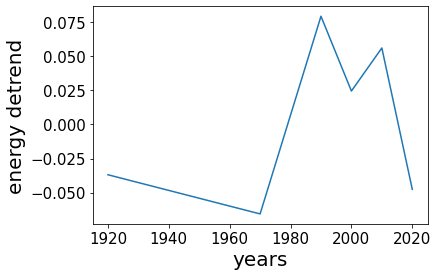

In [ ]:
#Proof: mean of energy  over time:
df1920_1950 = dftrend[(dftrend['year'] <= 1950)]
df1951_1970 = dftrend[(dftrend['year'] >= 1951) & (dftrend['year'] <= 1970)]
df1971_1990 = dftrend[(dftrend['year'] >= 1971) & (dftrend['year'] <= 1990)]
df1991_2000 = dftrend[(dftrend['year'] >= 1991) & (dftrend['year'] <= 2000)]
df2001_2010 = dftrend[(dftrend['year'] >= 2001) & (dftrend['year'] <= 2010)]
df2011_2020 = dftrend[(dftrend['year'] >= 2011) & (dftrend['year'] <= 2021)]
arrayDFByTime = [df1920_1950,df1951_1970,df1971_1990,df1991_2000,df2001_2010,df2011_2020]
listMed = []

print('mean over time:')
for time in arrayDFByTime:
  dfEnergy = time['detr']
  print(f'{dfEnergy.mean()}')

print('----------------------')
print('median over time:')
for time in arrayDFByTime:
  dfEnergy = time['detr']
  listMed.append(dfEnergy.median())
  print(f'{dfEnergy.median()}')

listYears = [1920, 1970, 1990, 2000, 2010 , 2020]

plt.plot(listYears, listMed)
plt.xlabel("years")
plt.ylabel("energy detrend")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


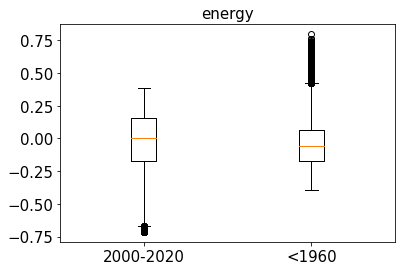

In [ ]:
df2001_2020 = dftrend[(dftrend['year'] >= 2000) & (dftrend['year'] <= 2020)]
df1960_0 = dftrend[(dftrend['year'] >= 0) & (dftrend['year'] <= 1960)]

newer_songs = df2001_2020['detr']
older_songs = df1960_0['detr']
data = [newer_songs, older_songs]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('energy')
plt.xticks([1, 2], ['2000-2020', '<1960'])
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


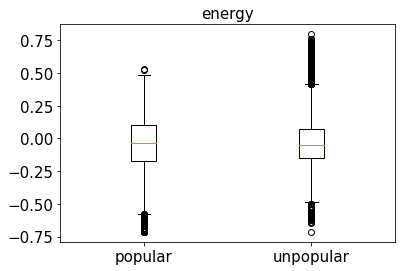

In [ ]:
dfpop = dftrend[(dftrend['popularity'] >= 70)]
dfunpop = dftrend[(dftrend['popularity'] == 0)]
pop_songs = dfpop['detr']
unpop_songs = dfunpop['detr']
data = [pop_songs, unpop_songs]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('energy')
plt.xticks([1, 2], ['popular', 'unpopular'])
plt.show()

In [ ]:
dateEnergyDF = {'years': listYears, 'energyMedian': listMed }
dateEnergyDF = pd.DataFrame(dateEnergyDF)
dateEnergyDF['energy_difference'] = dateEnergyDF['energyMedian'] - dateEnergyDF['energyMedian'].shift(1)
dateEnergyDF.isna().sum()
dateEnergyDF.dropna

<bound method DataFrame.dropna of    years  energyMedian  energy_difference
0   1920     -0.036896                NaN
1   1970     -0.065607          -0.028711
2   1990      0.079280           0.144887
3   2000      0.024451          -0.054829
4   2010      0.056023           0.031572
5   2020     -0.047544          -0.103567>

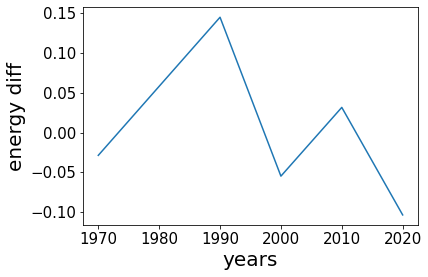

In [ ]:

plt.plot(dateEnergyDF['years'], dateEnergyDF['energy_difference'])
plt.xlabel("years")
plt.ylabel("energy diff")
plt.show()

Energy and loudness: strong coef. What if we multiply? Newer songs:

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


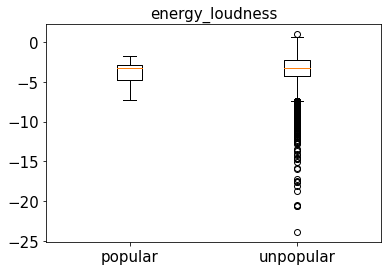

In [ ]:
dfweighted['energy_loudness'] = dfweighted['energy'] * dfweighted['loudness']
dfPopular2020 = dfweighted[(dfplots['popularity'] > 70) & (dfweighted['year'] <= 1960)]
dfUnPopular2020 = dfweighted[(dfweighted['popularity'] == 0) & (dfweighted['year'] <= 1960)]

popular_songs = dfPopular2020['energy_loudness']
unpopular_songs = dfUnPopular2020['energy_loudness']
data = [popular_songs, unpopular_songs]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('energy_loudness')
plt.xticks([1, 2], ['popular', 'unpopular'])
plt.show()

All Songs:

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


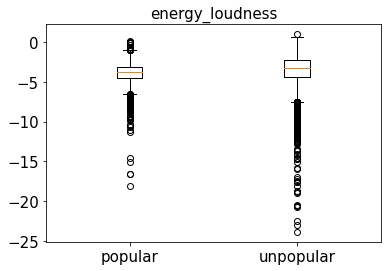

In [ ]:
dfweighted['energy_loudness'] = dfweighted['energy'] * dfweighted['loudness']
dfPopular2020 = dfweighted[(dfplots['popularity'] > 70)]
dfUnPopular2020 = dfweighted[(dfweighted['popularity'] == 0)]

popular_songs = dfPopular2020['energy_loudness']
unpopular_songs = dfUnPopular2020['energy_loudness']
data = [popular_songs, unpopular_songs]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('energy_loudness')
plt.xticks([1, 2], ['popular', 'unpopular'])
plt.show()

##Detrending energy and loudness

--> Overlapping ranges

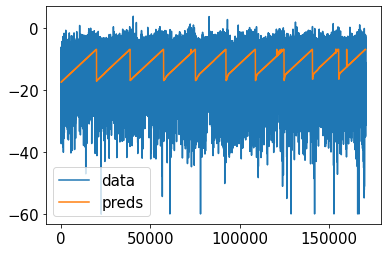

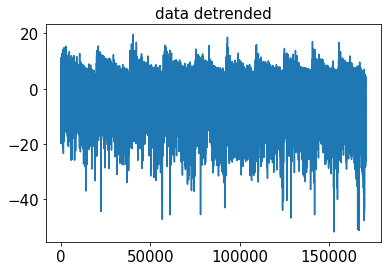

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


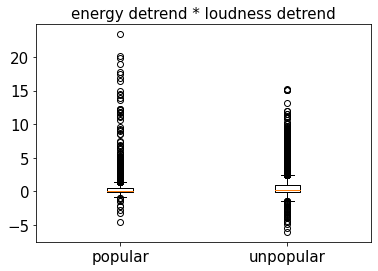

Quartiles popular
0.25   -0.024721
0.50    0.123878
0.75    0.536103
Name: energy_loudness, dtype: float64
Quartiles unpopular


0.25   -0.008792
0.50    0.254593
0.75    0.959152
Name: energy_loudness, dtype: float64

In [ ]:

#detrend:
X = df['year']
X = X.values.reshape(-1,1)
y = df['loudness']
lr = LinearRegression()
lr.fit(X, y)
# calculate trend
preds = lr.predict(X)
# plot trend
plt.plot(y)
plt.plot(preds)
plt.legend(['data', 'preds'])
plt.show()
detr = [y[i] - preds[i] for i in range(0, len(y))]
plt.plot(detr)
plt.title('data detrended')
plt.show()

dftrend2= dftrend
dftrend2['detrLoud'] = [y[i] - preds[i] for i in range(0, len(y))]


dftrend2['energy_loudness'] = dftrend2['detr'] * dftrend2['detrLoud']

dfpop = dftrend2[(dftrend2['popularity'] >= 70)]
dfunpop = dftrend2[(dftrend2['popularity'] == 0)]
pop_songs = dfpop['energy_loudness']
unpop_songs = dfunpop['energy_loudness']
data = [pop_songs, unpop_songs]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('energy detrend * loudness detrend')
plt.xticks([1, 2], ['popular', 'unpopular'])
plt.show()

print('Quartiles popular')
quartpop = dfpop.energy_loudness.quantile([0.25,0.5,0.75])
print(f'{quartpop}')
print('Quartiles unpopular')
dfunpop.energy_loudness.quantile([0.25,0.5,0.75])

#Duration 

In [ ]:
df2001_2020 = df[(df['year'] >= 2000) & (df['year'] <= 2020) & (df['popularity'] >= 70)]
df1960_0 = df[(df['year'] >= 0) & (df['year'] <= 1960) & (df['popularity'] >=70)]

df2001_2020.duration_ms.quantile([0.25,0.5,0.75, 1])

0.25    180951.50
0.50    206599.00
0.75    232842.25
1.00    632625.00
Name: duration_ms, dtype: float64

In [ ]:
df1960_0.duration_ms.quantile([0.25,0.5,0.75, 1])

0.25    146480.0
0.50    162333.0
0.75    179693.0
1.00    199093.0
Name: duration_ms, dtype: float64

## Detrending duration

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


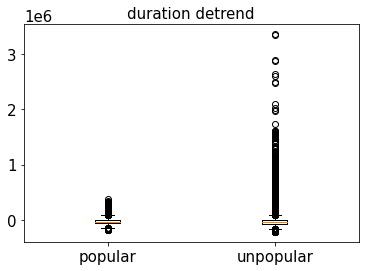

Quartiles popular
0.25   -62839.658189
0.50   -35398.046776
0.75    -4159.938081
Name: detrduration, dtype: float64
Quartiles unpopular


0.25   -68265.762135
0.50   -32038.012815
0.75    -4407.904120
Name: detrduration, dtype: float64

In [ ]:
#detrend:
X = df['year']
X = X.values.reshape(-1,1)
y = df['duration_ms']
lr = LinearRegression()
lr.fit(X, y)
# calculate trend
preds = lr.predict(X)
dftrend2['detrduration'] = [y[i] - preds[i] for i in range(0, len(y))]


dfpop = dftrend2[(dftrend2['popularity'] >= 70)]
dfunpop = dftrend2[(dftrend2['popularity'] == 0)]
pop_songs = dfpop['detrduration']
unpop_songs = dfunpop['detrduration']



data = [pop_songs, unpop_songs]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('duration detrend')
plt.xticks([1, 2], ['popular', 'unpopular'])
plt.show()

print('Quartiles popular')
quartpop = dfpop.detrduration.quantile([0.25,0.5,0.75])
print(f'{quartpop}')
print('Quartiles unpopular')
dfunpop.detrduration.quantile([0.25,0.5,0.75])

#Models evaluation

## Evaluation function

In [ ]:
from sklearn.metrics import r2_score
#Linear regression
def lrFit(df, X_cols, y_col):
  #Split data
  train_df, test_df = train_test_split(df, test_size=0.3)
  X_train = train_df[X_cols]
  y_train = train_df[y_col]
  X_test = test_df[X_cols]
  y_test = test_df[y_col]

  #Fit linear Reg + predictions
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  test_pred = lr.predict(X_test)

  #Scatter plot
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, test_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')

  mse = mean_squared_error(y_test, test_pred)
  #coefs
  print(f'Coefficients: {lr.coef_}')
  #intercept
  print(f'Intercept: {lr.intercept_}')
  #MSE
  print(f'MSE: {mse}')
  #R^2
  r2 = r2_score(y_test, test_pred)
  print(f'R^2 score = {r2}')
  plt.title(f'MSE: {mse:.2f}   R^2 score = {r2:.2f}')

##First Model: Everything goes

Coefficients: [ 4.37993172e-01  6.69502384e-01 -4.21851992e+00  2.87002042e+00
 -5.52239824e-07 -1.52435505e+00 -4.14671107e+00  3.91813397e-04
 -2.99155764e+00  1.57932766e-02 -6.94866064e+00  2.01967107e-03]
Intercept: -1288.9111096226043
MSE: 118.26619354852306
R^2 score = 0.7523643940870042


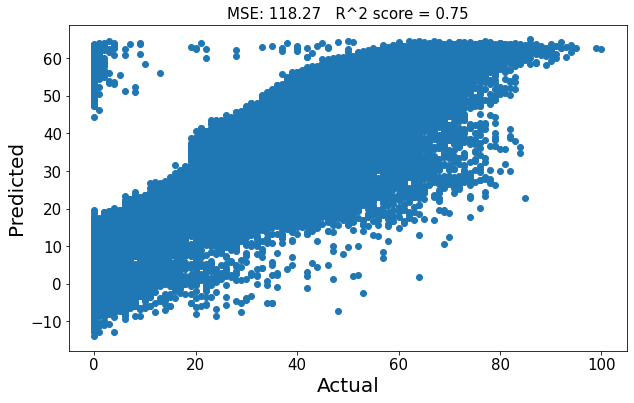

In [ ]:
dflr = dfplots.drop(columns='popularity')
X = dflr.columns
X = ['valence', 'year', 'acousticness' , 'danceability' , 'duration_ms' , 'energy' , 'instrumentalness' , 'key' , 'liveness' , 'loudness' , 'speechiness' , 'tempo']

lrFit(dfplots, X , 'popularity')

##Selected categories: coefs and year only

Coefficients: [ 0.71209788  4.4718213  -0.01847944]
Intercept: -1379.5592588893596
MSE: 119.58558134304185
R^2 score = 0.7488704850883628


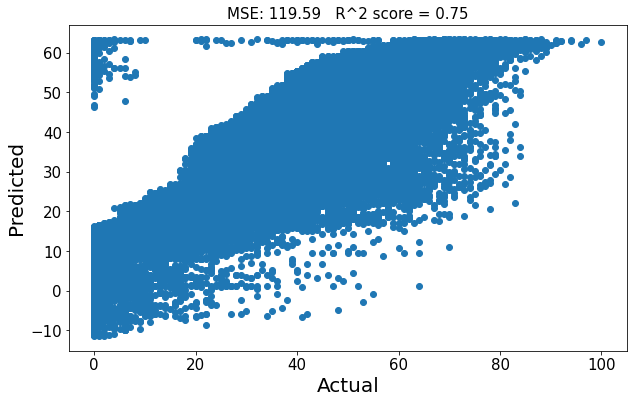

In [ ]:
X=[ 'year', 'instr_coef', 'acoust_and_years_coef']
lrFit(dfplots, X , 'popularity')

Coefficients: [ 0.71206899  4.421799   -0.01902055]
Intercept: -1379.456292736769
MSE: 120.30642388832064
R^2 score = 0.7478131181153231


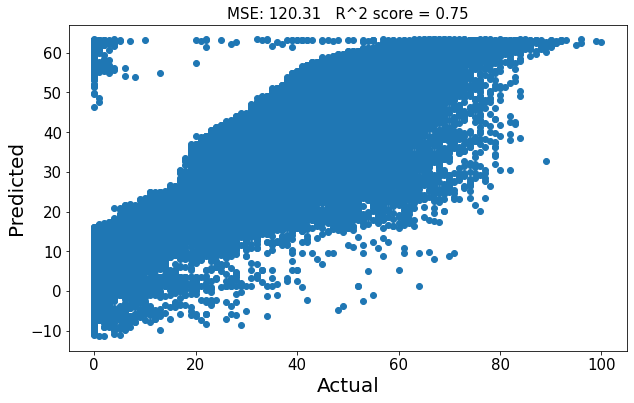

In [ ]:
X=[ 'year', 'instr_coef', 'acoust_and_years_coef']
lrFit(dfplots, X , 'popularity')

## Second model: everything + balanced data

##Balancing by popularity

###Balance function

In [ ]:
#take df and split by popularity group 
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['popularity'] >= 70)].shape[0]
  df70Plus = dfToBalance[(dfToBalance['popularity'] >= 70)]
  df60_30 = dfToBalance[(dfToBalance['popularity'] >= 30) & (dfToBalance['popularity'] < 70)]
  df60_30 = df60_30.sample(n = rows)
  df20_0 = dfToBalance[(dfToBalance['popularity'] < 30)]
  df20_0 = df20_0.sample(n = rows)

  assert df60_30.shape[0] == df70Plus.shape[0] == df20_0.shape[0]

  dfBalanced = pd.concat([df70Plus, df60_30, df20_0], axis=0)
  return dfBalanced

###Model analysis

In [ ]:
dfBalanced_weighted = balanceDf(dfweighted)

Coefficients: [ 0.84104219  6.73600906 -0.04909865]
Intercept: -1631.546239476026
MSE: 157.08741712121778
R^2 score = 0.7989917125197071


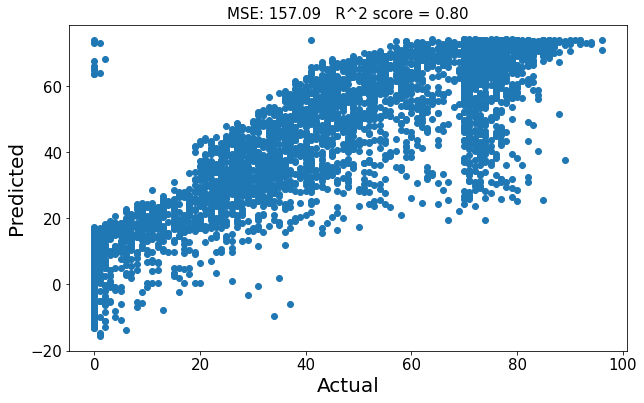

In [ ]:
X=[ 'year', 'instr_coef', 'acoust_and_years_coef']
lrFit(dfBalanced_weighted, X , 'popularity')

### Everything + Balanced data

Coefficients: [-1.88899597e+00  7.64495027e-01 -4.28534442e+00  6.45746761e+00
 -1.50074531e-07 -2.63693628e+00 -5.69683144e+00  1.24418666e-02
 -6.06148773e+00  3.01886351e-01 -6.52900836e+00 -2.55386382e-04]
Intercept: -1468.373747422063
MSE: 165.65766663798723
R^2 score = 0.7850977573488096


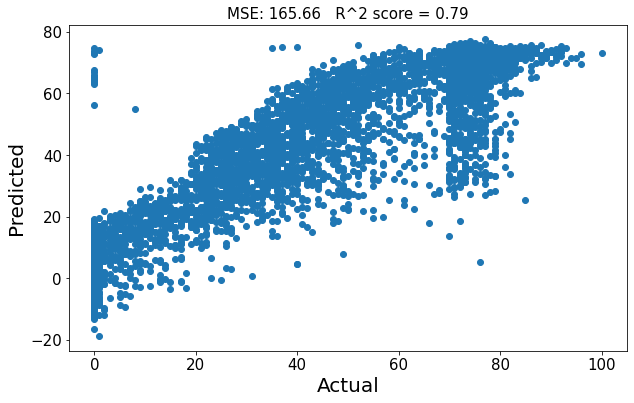

In [ ]:
X = ['valence', 'year', 'acousticness' , 'danceability' , 'duration_ms' , 'energy' , 'instrumentalness' , 'key' , 'liveness' , 'loudness' , 'speechiness' , 'tempo']
dfBalanced = balanceDf(df)
lrFit(dfBalanced, X , 'popularity')

##Rebalancing: smaller samples based on higher popularity

###Model analysis & smaller bins function

Coefficients: [-2.49532281e+00  8.30985579e-01 -4.20996277e+00  1.08039541e+01
 -3.68240793e-06 -7.04347744e+00 -4.01345646e+00  1.12597407e-01
 -4.27575583e+00  3.60769227e-01 -6.12535790e+00  4.36221640e-03]
Intercept: -1600.2259920810257
MSE: 187.94160346238044
R^2 score = 0.7981219439725507


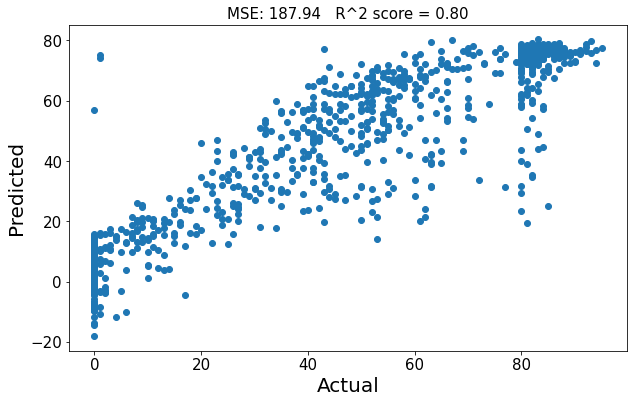

In [ ]:
#take df and split by popularity group 
def smallerSampling(df):
  rows = df[(df['popularity'] >= 80)].shape[0]
  df80Plus = df[(df['popularity'] >= 80)]
  df70_50 = df[(df['popularity'] >= 50) & (df['popularity'] < 80)]
  df70_50 = df70_50.sample(n = rows)
  df40_20 = df[(df['popularity'] >= 20) & (df['popularity'] < 50)]
  df40_20 = df40_20.sample(n = rows)
  df10_0 = df[(df['popularity'] < 20)]
  df10_0 = df10_0.sample(n = rows)
  assert df80Plus.shape[0] == df40_20.shape[0] == df10_0.shape[0] == df70_50.shape[0]
  dfBalanced = pd.concat([df80Plus, df70_50, df40_20, df10_0], axis=0)
  return dfBalanced

dfBalanced = smallerSampling(df)
X = ['valence', 'year', 'acousticness' , 'danceability' , 'duration_ms' , 'energy' , 'instrumentalness' , 'key' , 'liveness' , 'loudness' , 'speechiness' , 'tempo']
lrFit(dfBalanced, X , 'popularity')


## Third model: smaller bins for balancing, year and coefficients

Coefficients: [ 0.87613724  8.87091309 -0.02616199]
Intercept: -1703.0558250027532
MSE: 146.53403526087027
R^2 score = 0.8352932522397147


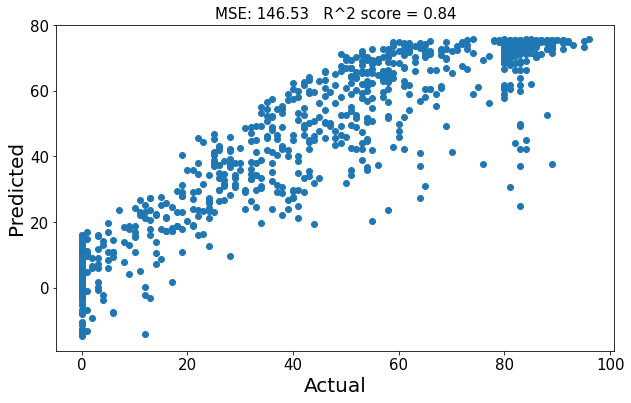

In [ ]:
dfBalanced = smallerSampling(dfweighted)
X=[ 'year', 'instr_coef', 'acoust_and_years_coef']
lrFit(dfBalanced, X , 'popularity')

## Third model: looking at outliers

In [ ]:
dfweighted.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,years_in_the_past,acoust_and_years_coef,instr_coef,energy_loudness
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,10,0.665,-20.096,4,0.0366,80.954,1,0.982,0.122000,-4.240256
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,7,0.160,-12.441,5,0.4150,60.936,1,0.732,1.000000,-4.242381
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,3,0.101,-14.850,5,0.0339,110.339,1,0.961,0.087000,-2.465100
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,5,0.381,-9.316,3,0.0354,100.109,1,0.967,0.999972,-2.878644
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,3,0.229,-10.096,2,0.0380,101.665,1,0.957,0.999998,-1.948528


In [ ]:
#Split data
train_df, test_df = train_test_split(dfBalanced_weighted, test_size=0.3)
X_train = train_df[[ 'year', 'instr_coef', 'acoust_and_years_coef']]
y_train = train_df['popularity']
X_test = test_df[[ 'year', 'instr_coef', 'acoust_and_years_coef']]
y_test = test_df['popularity']

  #Fit linear Reg + predictions
lr = LinearRegression()
lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)

test_df['test_pred'] = lr.predict(X_test)
test_df['absolute_diff'] = abs(test_df['test_pred'] - test_df['popularity'])
test_df.nlargest(20, 'absolute_diff')

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,years_in_the_past,acoust_and_years_coef,instr_coef,energy_loudness,test_pred,absolute_diff
92209,0.594,2020,0.24400,0.730,198720,0.769,0.000021,2,0.1360,-4.936,0,0.1780,181.988,100,24.40000,0.999979,-3.795784,73.255076,73.255076
4006,0.247,1942,0.67300,0.317,177480,0.158,0.353000,9,0.3380,-16.485,76,0.0381,130.503,22,14.80600,0.647000,-2.604630,5.194627,70.805373
75089,0.541,2020,0.13600,0.640,212520,0.680,0.000000,10,0.1430,-6.659,3,0.0502,104.108,100,13.60000,1.000000,-4.528120,73.753661,70.753661
123853,0.727,2015,0.10300,0.591,92010,0.891,0.001040,5,0.3990,-7.447,0,0.2100,148.722,95,9.78500,0.998960,-6.635277,69.685582,69.685582
154443,0.392,2014,0.00469,0.795,300971,0.787,0.035600,11,0.0800,-7.219,0,0.3270,125.057,94,0.44086,0.964400,-5.681353,69.033946,69.033946
154079,0.380,2013,0.10200,0.626,219584,0.735,0.000000,4,0.2940,-11.702,0,0.0732,127.887,93,9.48600,1.000000,-8.600970,68.011641,68.011641
154451,0.569,2015,0.00438,0.766,214163,0.833,0.327000,11,0.1140,-8.579,0,0.0351,129.999,95,0.41610,0.673000,-7.146307,67.897041,67.897041
123859,0.298,2014,0.35700,0.579,187089,0.769,0.000000,8,0.0725,-4.527,0,0.0640,126.065,94,33.55800,1.000000,-3.481263,67.748078,67.748078
155263,0.238,2019,0.36500,0.343,239733,0.629,0.725000,8,0.3540,-11.163,0,0.0543,132.197,99,36.13500,0.275000,-7.021527,66.926403,66.926403
155178,0.122,2019,0.00161,0.664,295728,0.872,0.759000,2,0.1870,-8.050,2,0.0431,129.864,99,0.15939,0.241000,-7.019600,68.355098,66.355098


In [ ]:
df.iloc[[92209]]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,mode,name,popularity,release_date,speechiness,tempo,detr,detrLoud,energy_loudness,detrduration
92209,0.594,2020,0.244,['KAROL G'],0.73,198720,0.769,0,4PyKzQtvCAo6kMaK4ZZH6P,0.000021,...,1,A Ella,0,2020-11-20,0.178,181.988,0.04998,1.89879,0.094902,-48990.046776


In [ ]:
df.iloc[[4006]]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,mode,name,popularity,release_date,speechiness,tempo,detr,detrLoud,energy_loudness,detrduration
4006,0.247,1942,0.673,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,177480,0.158,0,4so0Wek9Ig1p6CRCHuINwW,0.353,...,1,White Christmas,76,1942-01-01,0.0381,130.503,-0.133896,-1.28718,0.172348,-39974.737
